In [681]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
from pykalman import KalmanFilter
#END OF HEADER

In [682]:
# net probelov v imenah SVS
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
filename =   os.path.basename('pol20010.20o')
#filename =   os.path.basename('pol20020.20o')
#filename =   os.path.basename('pol20030.20o')
#filename =   os.path.basename('pol20040.20o')
#filename =   os.path.basename('pol20050.20o')

#print(filename1)
file1 = open (filename)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal

for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(line)
    #line  = file1.readline()
   
    #re.findall(r'G..|R..', param)END OF HEADER
  
    if ln==23:
        times = (line[4:24])
        #print(line)
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        #print(times)
        timeArr = times
    if ln >= 25 :
        param=line.strip() #str
        
#        print(line)
#        print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы        # type list
        

        if result :  #
            #result = re.sub('\s', '', result)# est probeli 
            arrSvs.append(result)#[['G16', 'G23', 'G06', 'G09', 'G04', 'G22', 'G03', 'G26', 'G14', 'G31'], ['G16', 'G02....]]
            
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747      type STR
            res = re.sub('\s\w\s', '7 ', param)#zamena otshipaih jstatkov na 7
            res=res.replace(' ',"-")
            res=res.replace('------------------','-NaN-')
            res=res.replace('----------','-')
            res=res.replace('----','-')
            res=res.replace('--','-')
            res=res.replace('--','-')
            #print(ln,' ',res)
            res= res.split("-")  #          Type list
            #param = list(map(float, param))
           # print(ln)
            
           
            test.append(res)


In [945]:
#print(len(arrSvs))
#print(len(test))
voln=[]
voln2=[]
SVS=[]

for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
        #print(x,' ',test[x])
        #if len(test[x])<4:
        #    flash2.append(x)
        if len(test[x])==4:
            #flash4.append(x)
            test[x].append('NaN')
        if len(test[x])==3:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN')
        if len(test[x])==2:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')
        if len(test[x])==1:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')   
            test[x].append('NaN') 
       # print(x)
       # print('chet ',len(test[x]))
      #  print('chet ',test[x])
        voln.append(test[x])
    elif x%2!=0:
#    else:
        #print(test[x])
        if len(test[x])==1:
            #flash.append(x)
            #print(x)
            test[x].append('NaN')
            test[x].append('NaN')
        if len(test[x])==2:
            #flash.append(x)
            test[x].append('NaN')
        voln2.append(test[x])
#################################################################################        
epoch=[]
t=0
##arrSvs ==[['G16', 'G23', 'G6', 'G9', 'G4', 'G22', 'G3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
for i in range(len(arrSvs)):#  SVS epoch columns

    for ii in range(len(arrSvs[i])):
  
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        SVS.append(arrSvs[i][ii])
        epoch.append(t) # massiv po 30 sec
        #SVS.append(arrSvs[i])
    t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
    
#print(len(epoch))
   
voln2

[['23892086.812', '41.750', '26.0004'],
 ['21359940.829', '49.750', '45.2504'],
 ['24292754.559', '42.750', '41.500'],
 ['22063367.396', '46.000', '37.5004'],
 ['24046556.198', '41.750', '43.500'],
 ['21494300.954', '47.250', '41.2504'],
 ['21407573.413', '52.750', '50.000'],
 ['24149873.656', '40.000', '42.250'],
 ['20786216.271', '54.000', '52.250'],
 ['23894720.855', '41.250', '25.5004'],
 ['21353190.763', '49.500', '45.2504'],
 ['24311954.589', '41.750', '41.000'],
 ['22067992.013', '45.750', '37.0004'],
 ['24029345.122', '41.500', '43.500'],
 ['21481695.990', '47.000', '41.0004'],
 ['21422910.346', '52.750', '50.000'],
 ['24159864.311', '38.750', '42.250'],
 ['20782245.779', '54.250', '52.000'],
 ['23897462.764', '41.250', '24.7504'],
 ['21346475.350', '49.750', '45.7504'],
 ['24331159.063', '42.250', '42.750'],
 ['22072733.309', '46.750', '37.0004'],
 ['24012164.179', '42.000', '43.250'],
 ['21469145.465', '47.000', '41.5004'],
 ['21438328.082', '52.500', '49.750'],
 ['24169923.6

In [923]:
#arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
c_cons = 3e+5      # skorost sveta
#c_cons = 299792458
#
#arrFS = np.array(voln2,dtype=object)
df = pd.DataFrame(voln, columns=['L1','L2','C1','P1','C2'])
df2 = pd.DataFrame(voln2, columns=['P2','S1','S2'])

#df_join = df.join(df2, rsuffix='_right') 
df_all = df.join(df2)
df_all.insert(loc=0, column="svs", value=arrS)
df_all.insert(loc=1, column="epoch", value=epoch)
df_all = df_all.astype({'L1':'float','L2':'float','C1':'float','P1':'float','C2':'float','P2':'float','S1':'float','S2':'float'})

df_all.dropna(inplace=True)
#df_all.dropna(inplace=True)
dfa = df_all.drop(['C2', 'S1','S2'], axis=1)
dfa['epoch_h']= (dfa['epoch']/3600)
#dfa.dtypes


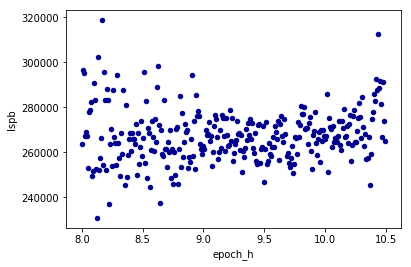

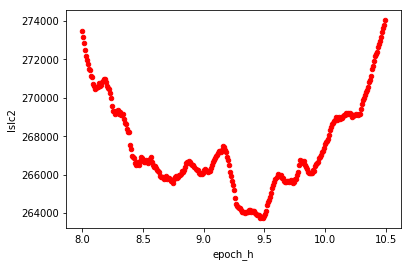

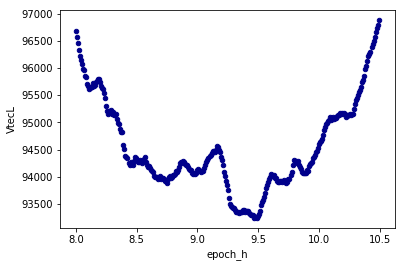

Text(0, 0.5, 'TEC')

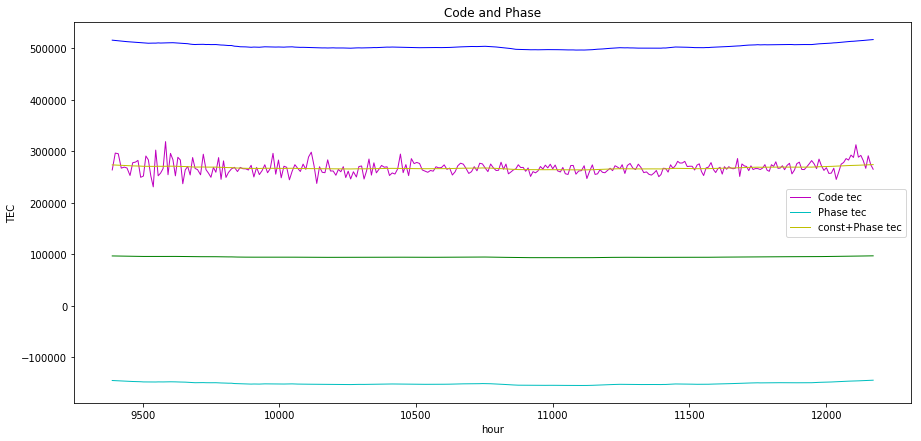

In [943]:
dfa['factor']=((1575.43**2)*(1227.60**2))/(40.308*(1575.43**2-1227.60**2)) # коэффициент, конвертирующий метры в единицу ТЕС 
#dfa['factor']=(1/40.308)*(1575.43**2*1227.60**2)/(1575.43**2-1227.60**2) # коэффициент, конвертирующий метры в единицу ТЕС 
#DCBs = -1.059   #G4
#c = 299792458 #м/с
#f1 = 1.57542×10  Гц,  
#длина радиоволны λ1 = 0.1902936728 м
#f2 = 1.22760×10  Гц,  
#длина радиоволны λ2 = 0.2442102134 м


DCBs =3.347 #G17
#DCBs = -2.059
#df['ff2']=(1575.43**2*1227.60**2)/((1575.43**2-1227.60**2)*40.308)
dfa['Ispb']= dfa['factor']*(dfa['P2']-dfa['P1'])  # prilomlinie koef  0.0248

l1 = c_cons/1575.43
l2 = c_cons/1227.60
oi = 1/95175.671459

dfa['Islc']= dfa['factor']*(dfa['L1']*0.1902936728-dfa['L2']*0.2442102134)# P.S. poprob ukaz v mm cm m
dfa['Vtec']=dfa['Ispb']*np.sqrt(1-(6400*np.cos(80)/(6400+400)))#0.9782
dfa['Vtec2']=dfa['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.sin(80)))   #0.9782
dfa['Vtec3']=dfa['Ispb']*np.cos(np.arcsin((6400/(6400+400))* np.cos(80)))   #0.9782
dfa = dfa.loc[(ds['epoch_h'] >= 8) & (dfa['epoch_h'] < 10.5)]# c 6 часа по 8 угол 80
dfa['Cr']=  dfa['Ispb']-dfa['Islc']
#dfa['CrCon']= ((1/dfa['factor'])*dfa['Cr'].count())     # ne sum ne mean ne rabot variant ne veren
#dfa['CrCon']= (1/dfa['Cr'].count())*dfa['Cr'].sum()    
dfa['CrCon']= ((1/dfa['Cr'].count())*dfa['Cr'].sum())
#dfa['CrConst']= (1/dfa['Cr'].count())*dfa['Cr'].mean()
#dfa['CrConst']= (1/dfa['factor'])*dfa['Cr'].sum()/dfa['Cr'].count()
#dfa['Islc2']= dfa['factor']*(dfa['L1']*0.1902936728-dfa['L2']*0.2442102134)+(1/dfa['factor']*(1/dfa['Cr'].count())*dfa['Cr'].sum())
dfa['Islc2']= dfa['Islc']+dfa['CrCon']
dfa['VtecL']=dfa['Islc2']*np.cos(np.arcsin((6400/(6400+400))* np.sin(80)))   #0.9782
dfa['VtecL2']=dfa['Islc2']**np.sqrt(1-(6400*np.cos(80)/(6400+400)))#
#dfa['C']= (dfa['Ispb']-dfa['Islc'])**2
#dfa['Cr']=(dfa['C']/dfa.C.count())
#print(np.sqrt(dfa.C.sum()))
MF = (np.cos(np.arcsin((6400/(6400+400))* np.sin(80))))**-1
dfa['Rfactor']=(40.308*((1575.43**2)-(1227.60**2)))/(c_cons*((1575.43**2)*(1227.60**2))) # kombinaciya chastot
dfa['P2-P1']=(dfa['P2']-dfa['P1'])/c_cons # растоян 2 частот - растоян 1 частот на скорость света 
#dfa['bi'] = dfa['Ispb'] - dfa['Islc']

#dfa['P2-P1']=(dfa['factor']*(dfa['P2']-dfa['P1'])/c_cons) # ?
#dfa['DCBr']=dfa['Rfactor']*dfa['Ispb']-dfa['P2-P1']-DCBs # обрат частот коэф * пэс - разниц растояни частот - ДКЗспут
#dfa['DCBr']=dfa['Rfactor']*dfa['Vtec2']*MF-dfa['P2-P1']-DCBs # обрат частот коэф * пэс - разниц растояни частот - ДКЗспут
dfa['DCBr']=dfa['Rfactor']*dfa['Vtec2']*MF-dfa['P2-P1']-DCBs
#dfa['Ibias']= dfa['factor']*(-4.65-1.059)* c_cons # hernya
#dfa['Ibias']= dfa['factor']*(DCBs+dfa['DCBr'])  # 
#print(dfa)
#dfa['Ispb2']=dfa['Ispb']+dfa['Ibias']
#df['Vtec2']=df['Islc']*np.cos(np.arctan(6400000*np.cos(80)/(6400000+350000)))
#df['Islc']= df['ff']*(df['L1']*19.04-df['L2']*24.43)# P.S. poprob ukaz v mm cm m
                                                            ####  ---     --- ---    -- -    SITEL  -  -  - - - - -  - - -
ds = (dfa.loc[dfa['svs'] == 'G04'])#18 #10 #7
#ds =  dfa[dfa['svs'].isin(['G04','G06','G07','G17','G27','G30'])]
#ds =  dfa[dfa['svs'].isin(['G04','G17','G12','G32','G07'])]
#ds =  dfa[dfa['svs'].isin(['G30','G12','G04','G17'])]
#ds = dfa
out = ds.loc[:,["epoch_h","svs","Ispb","Vtec",'Vtec2','Vtec3']]
out.to_csv('out_d1.csv', sep=';', encoding='utf-8')                    ############     C S V  ###########
#ds = (df.loc[df['epoch_h'] == ''])
#ds = ds.loc[(ds['epoch_h'] >= 12.8) & (ds['epoch_h'] < 17)]# c 6 часа по 8 угол 80
#print(ds)

#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']-df['L2'])
#df['Islc']= 0.0248*df['ff']/(1575.43**2-1227.60**2)*(df['L1']*(c_cons/1575.43)-df['L2']*(c_cons/1227.60))

#print(df.dtypes)
#ds = (df.loc[df['svs'] == 'G6'])
#
ds.plot.scatter(x='epoch_h',y='Ispb',c='DarkBlue')
#ds.plot.scatter(x='epoch_h',y='Vtec',c='DarkGreen')
#ds.plot.scatter(x='epoch_h',y='bi',c='DarkGreen')
#ds.plot(x='epoch_h',y='Vtec2',c='DarkGreen')
#ds.plot(x='epoch_h',y='Ispb2',c='DarkGreen')
#ds.plot.scatter(x='epoch_h',y='beta',c='DarkGreen')
ds.plot.scatter(x='epoch_h',y='Islc2',c='red')
ds.plot.scatter(x='epoch_h',y='VtecL',c='DarkBlue')

plt.show()
plt.figure(figsize=(15,7))
plt.plot(ds.Ispb , 'm', lw=1)
plt.plot(ds.Islc , 'c', lw=1)
plt.plot(ds.Islc2 , 'y', lw=1)
plt.plot(dfa['VtecL'], 'g', lw=1)
plt.plot(dfa['VtecL2'], 'b', lw=1)
plt.title('Code and Phase')
plt.legend(['Code tec', 'Phase tec', 'const+Phase tec'])
plt.xlabel('hour')
plt.ylabel('TEC')


In [884]:
#varVal = ds.Ispb.values
#print(ds.Ispb)

#kf = KalmanFilter(transition_matrices = [1],
#              observation_matrices = [1],
#              initial_state_mean = 0,
#              initial_state_covariance = 1,
#              observation_covariance=1,
#              transition_covariance=.1)#

#mean, cov = kf.filter(ds.Ispb.values)
#mean, std = mean.squeeze(), np.std(cov.squeeze())
#plt.figure(figsize=(15,7))
#plt.plot(ds['Ispb'].values , 'm', lw=1)
#plt.plot(ds['Ispb'].values -mean, 'm', lw=1)
#plt.plot(np.sqrt(cov.squeeze()), 'y', lw=1)
#plt.plot(-np.sqrt(cov.squeeze()), 'c', lw=1)
#plt.title('Kalman filter estimate')
#plt.legend(['Error: real_value - mean', 'std', '-std'])
#plt.xlabel('hour')
#plt.ylabel('TEC')
#len(varVal)

41092.57537719456


Text(0, 0.5, 'TEC')

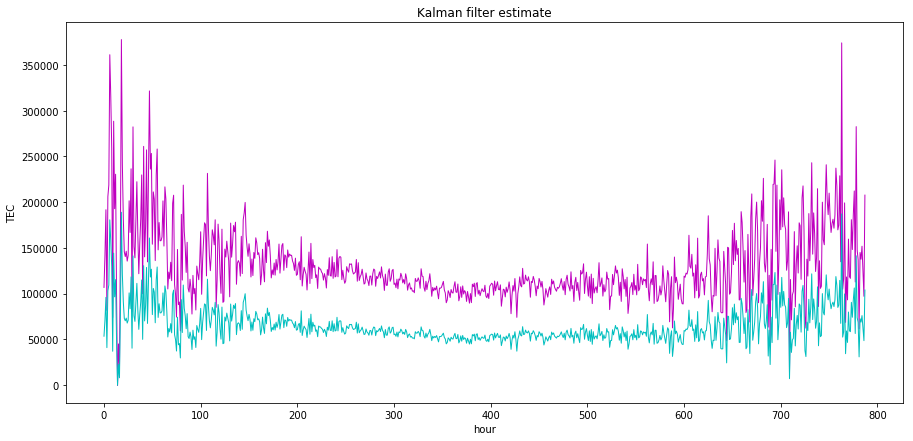

In [804]:
a = np.std(varVal)
print(a)
varStd = 159347.937914
varProc = 0.02
Nvarr =[]
err_measure = a  # примерный шум измерений
q = 1   #скорость изменения значений 0.001-1, варьировать самому
err_estimate = 0
def simpleKalman(newVal):
    for i in newVal:
        kalman_gain = 0
        current_estimate = 0
        err_estimate = err_measure
        last_estimate = 0
        kalman_gain = err_estimate / (err_estimate + err_measure)
        current_estimate = last_estimate + kalman_gain * (i - last_estimate)
        err_estimate =  (1.0 - kalman_gain) * err_estimate + abs(last_estimate - current_estimate) * q
        last_estimate = current_estimate
        
        Nvarr.append(current_estimate)

'''
def Kf (val):
    for i in val:
#        print (i)
        Pc = 0
        G =0 
        P=1
        Xp=0
        Xe = 0
        Zp=0
        Pc = P + varProc
        G = Pc/(Pc+varStd)
        P = (1-G)*Pc
        Xp = Xe
        Zp=Xp
#        Xe = G*(val[i]-Zp)+Xp
        Xe = G*(i-Zp)+Xp
        print(Xe)
        Nvarr.append(Xe)
'''        
#print(varVal[0])
#varVal
simpleKalman(varVal)
#s = Kf(varVal)
#ds.insert(loc=0, column="IspbKf", value=Nvarr)
#dfa.Ispb_std
ds
plt.figure(figsize=(15,7))
plt.plot(varVal , 'm', lw=1)
plt.plot(Nvarr , 'c', lw=1)
#plt.plot(varVal-Nvarr , 'g', lw=1)
plt.title('Kalman filter estimate')
#plt.legend(['Error: real_value - mean', 'std', '-std'])
plt.xlabel('hour')
plt.ylabel('TEC')

In [944]:
dfa

,svs,epoch,L1,L2,C1,P1,P2,epoch_h,factor,Ispb,...,Vtec2,Vtec3,Cr,CrCon,Islc2,Rfactor,P2-P1,DCBr,VtecL,VtecL2
9389,G04,28800,1.138271e+08,8.869644e+07,2.166057e+07,2.166057e+07,2.166057e+07,8.000000,95175.671459,263636.609899,...,93202.454363,262209.910972,408818.263940,418638.052579,273456.398538,3.502296e-11,0.000009,-3.347,96674.007130,515632.274418
9400,G04,28830,1.137624e+08,8.864605e+07,2.164827e+07,2.164827e+07,2.164827e+07,8.008333,95175.671459,296377.040929,...,104777.055213,294773.163507,441872.752702,418638.052579,273142.340807,3.502296e-11,0.000010,-3.347,96562.979487,515010.099478
9411,G04,28860,1.136979e+08,8.859581e+07,2.163600e+07,2.163600e+07,2.163600e+07,8.016667,95175.671459,295139.757174,...,104339.642963,293542.575452,440927.792334,418638.052579,272850.017420,3.502296e-11,0.000010,-3.347,96459.635505,514431.014678
9422,G04,28890,1.136337e+08,8.854571e+07,2.162376e+07,2.162376e+07,2.162376e+07,8.025000,95175.671459,267158.109788,...,94447.396911,265712.353872,413312.121171,418638.052579,272484.041197,3.502296e-11,0.000009,-3.347,96330.253314,513706.069896
9433,G04,28920,1.135695e+08,8.849576e+07,2.161156e+07,2.161156e+07,2.161156e+07,8.033333,95175.671459,269156.799039,...,95153.985968,267700.226993,415603.133100,418638.052579,272191.718519,3.502296e-11,0.000009,-3.347,96226.909582,513127.057329
9443,G04,28950,1.135056e+08,8.844595e+07,2.159940e+07,2.159940e+07,2.159940e+07,8.041667,95175.671459,267348.460808,...,94514.690987,265901.674786,413995.353230,418638.052579,271991.160157,3.502296e-11,0.000009,-3.347,96156.006943,512729.823402
9454,G04,28980,1.134419e+08,8.839629e+07,2.158727e+07,2.158727e+07,2.158727e+07,8.050000,95175.671459,252881.758857,...,89400.332519,251513.261006,399754.263347,418638.052579,271765.548089,3.502296e-11,0.000009,-3.347,96076.247161,512282.984834
9464,G04,29010,1.133783e+08,8.834677e+07,2.157518e+07,2.157518e+07,2.157518e+07,8.058333,95175.671459,277722.609102,...,98182.224428,276219.682219,424834.912904,418638.052579,271525.748777,3.502296e-11,0.000010,-3.347,95991.471816,511808.068161
9474,G04,29040,1.133150e+08,8.829741e+07,2.156312e+07,2.156312e+07,2.156313e+07,8.066667,95175.671459,278864.717346,...,98585.989639,277355.609818,426071.023430,418638.052579,271431.746496,3.502296e-11,0.000010,-3.347,95958.239545,511621.904740
9483,G04,29070,1.132518e+08,8.824819e+07,2.155110e+07,2.155110e+07,2.155111e+07,8.075000,95175.671459,282195.865862,...,99763.637985,280668.731451,429672.155404,418638.052579,271161.763037,3.502296e-11,0.000010,-3.347,95862.793313,511087.243917
